In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa

In [8]:

exp_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/"


methods = ["cheat", "none", "juharmonize","leak","notarget"]
results_method = pd.DataFrame()
results = pd.DataFrame()
for method in methods:
    results_method = pd.DataFrame()

    print(method)

    results_method["y_pred"] = pd.read_csv(exp_dir+ "y_pred_"+method+".csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    
    results_method["y_true"] = pd.read_csv(exp_dir+ "y_true.csv", index_col=0).dropna(axis=1).to_numpy().ravel()
    results_method["site"] = pd.read_csv(exp_dir+ "sites.csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    results_method["y_diff"] = (results_method["y_true"]-results_method["y_pred"])
    results_method["Harmonization Scheme"] = method
    results = pd.concat([results,results_method])



cheat
none
juharmonize
leak
notarget


In [ ]:
data

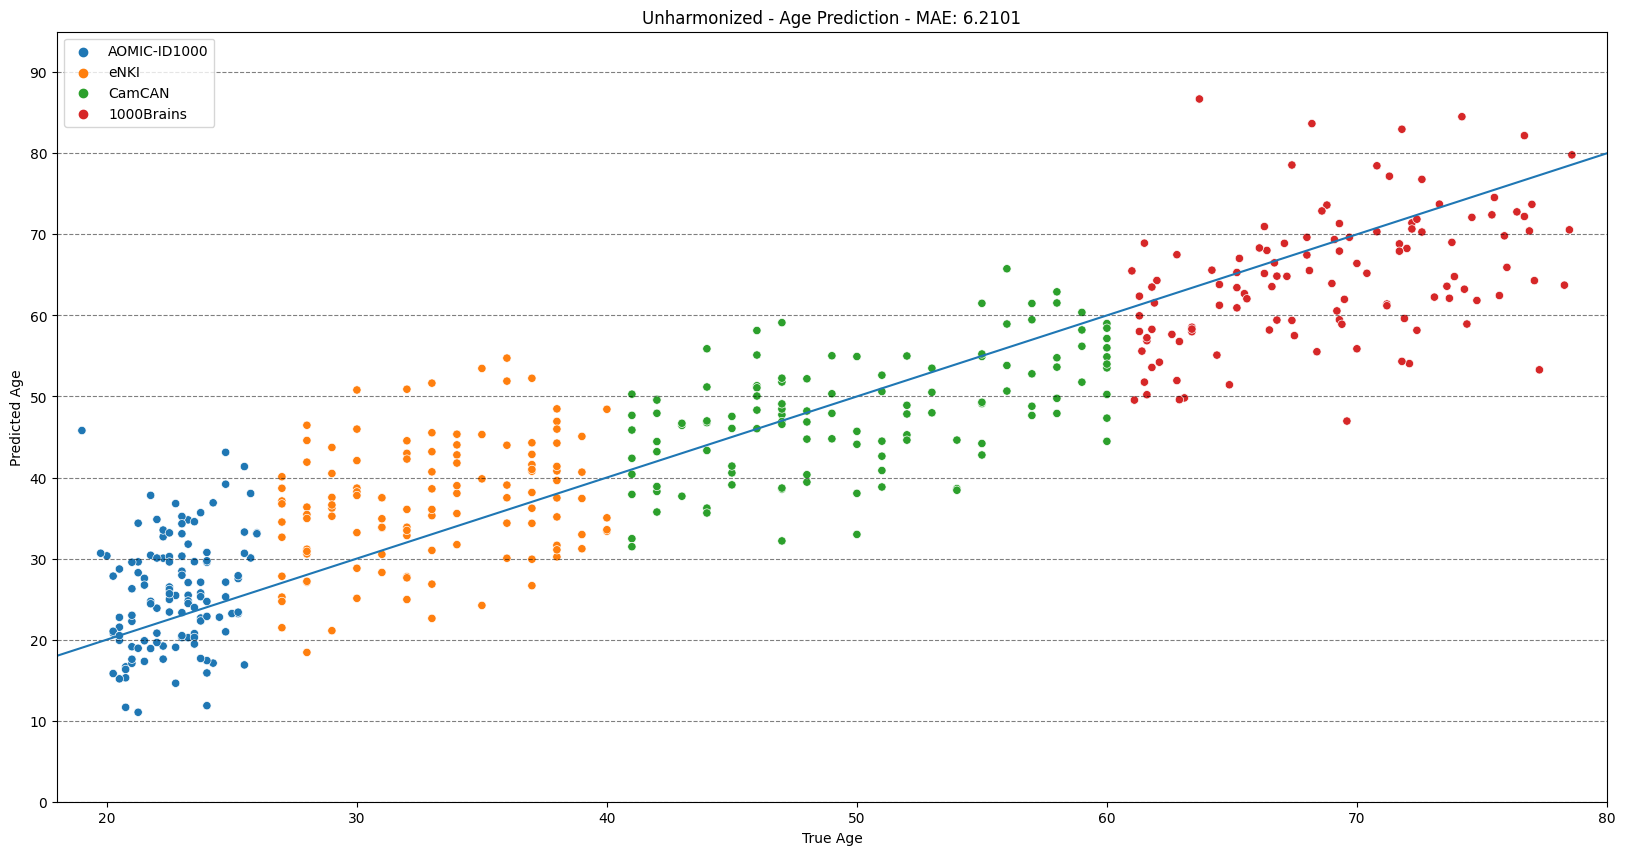

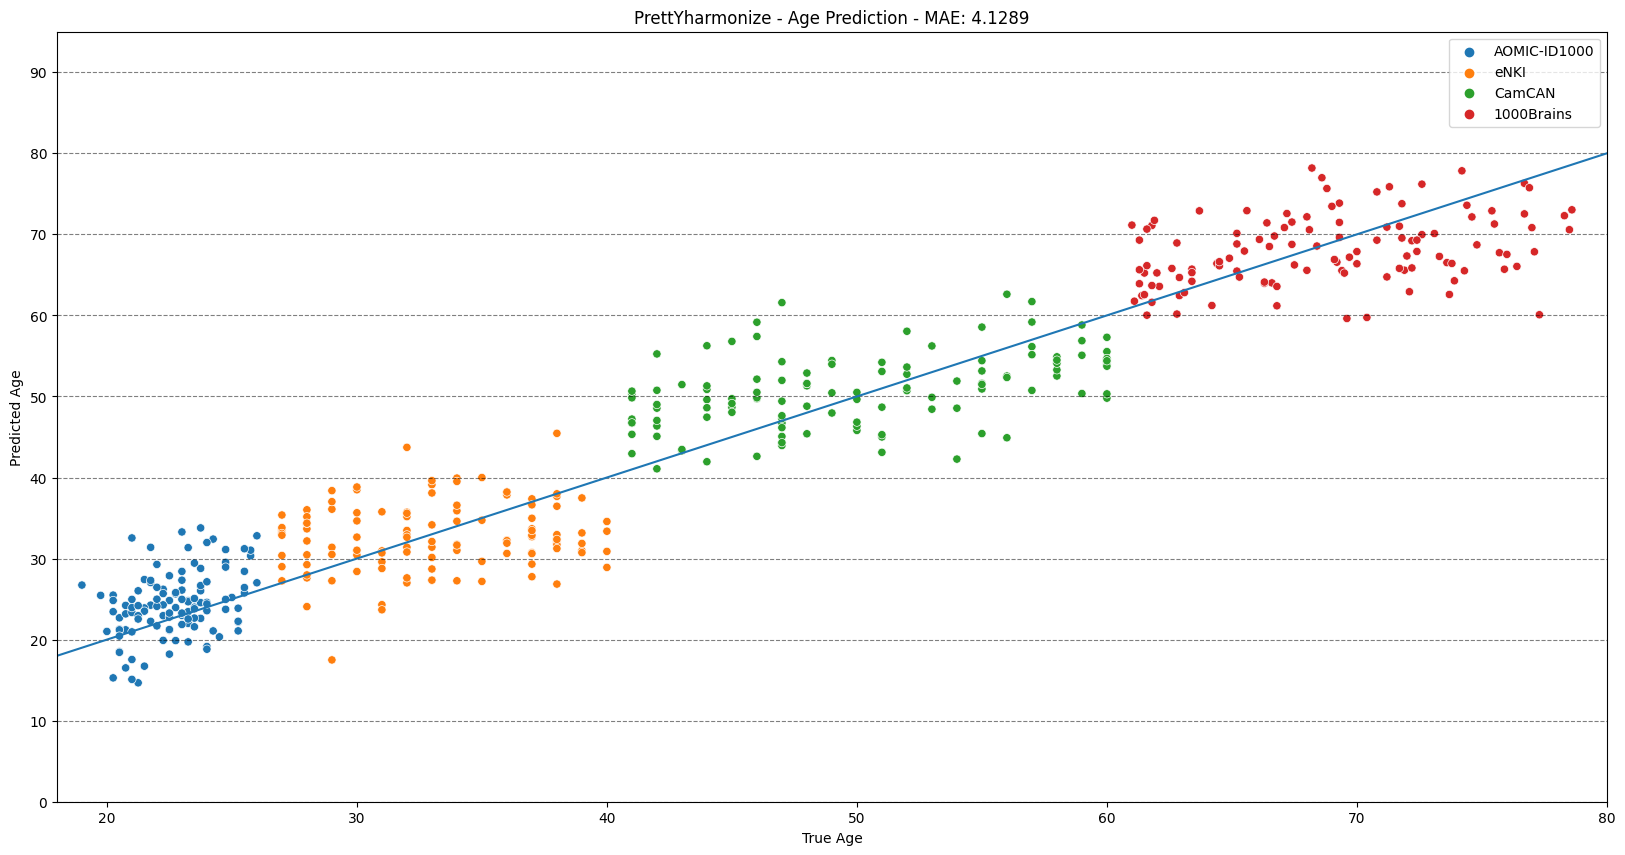

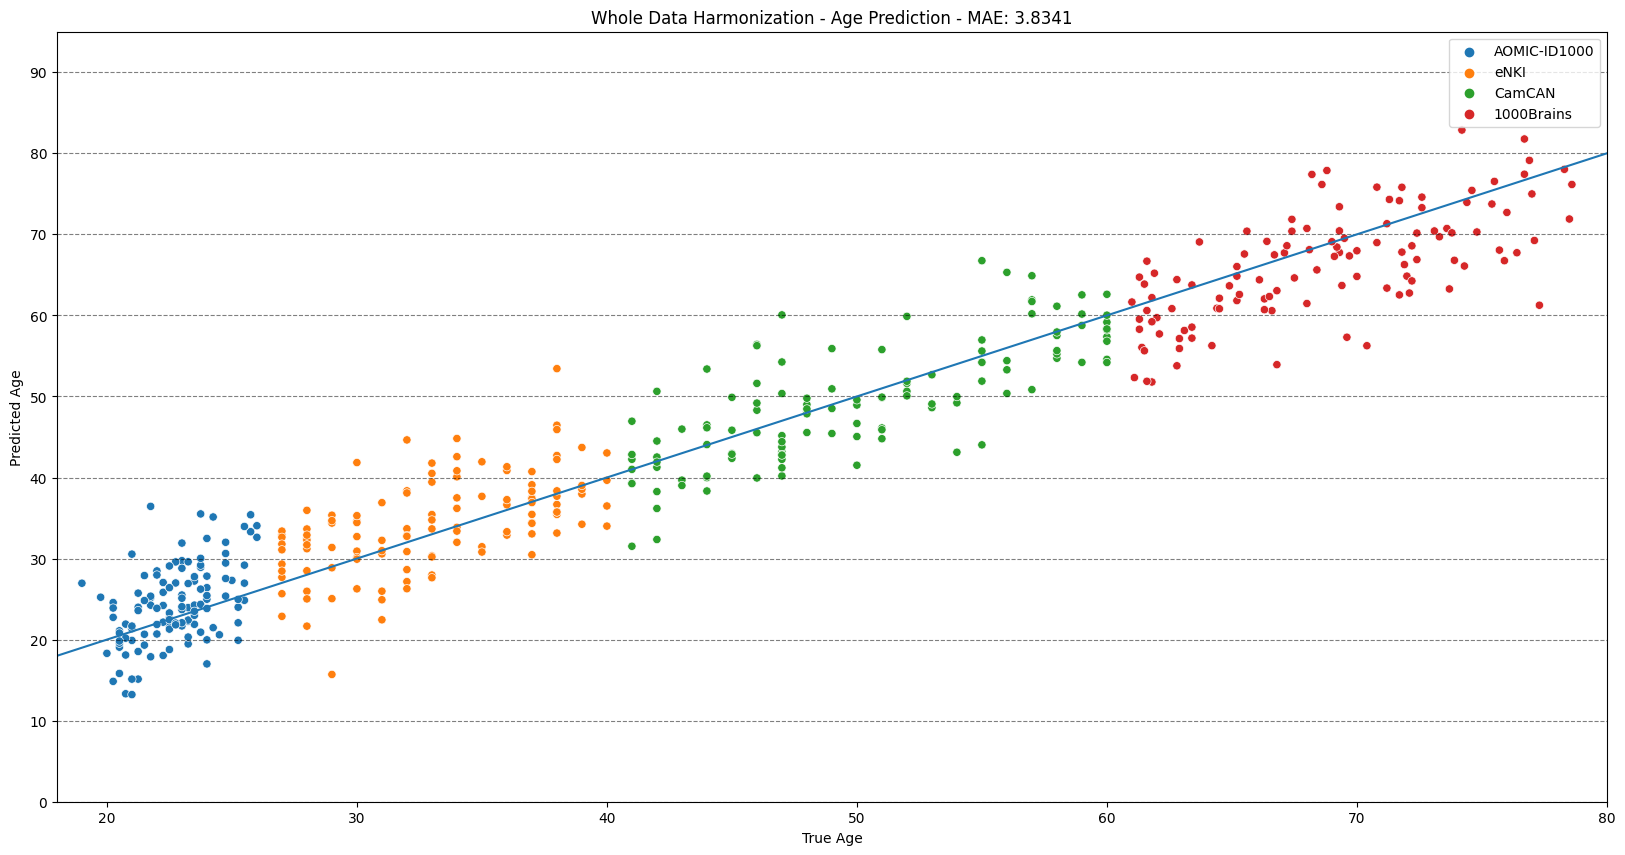

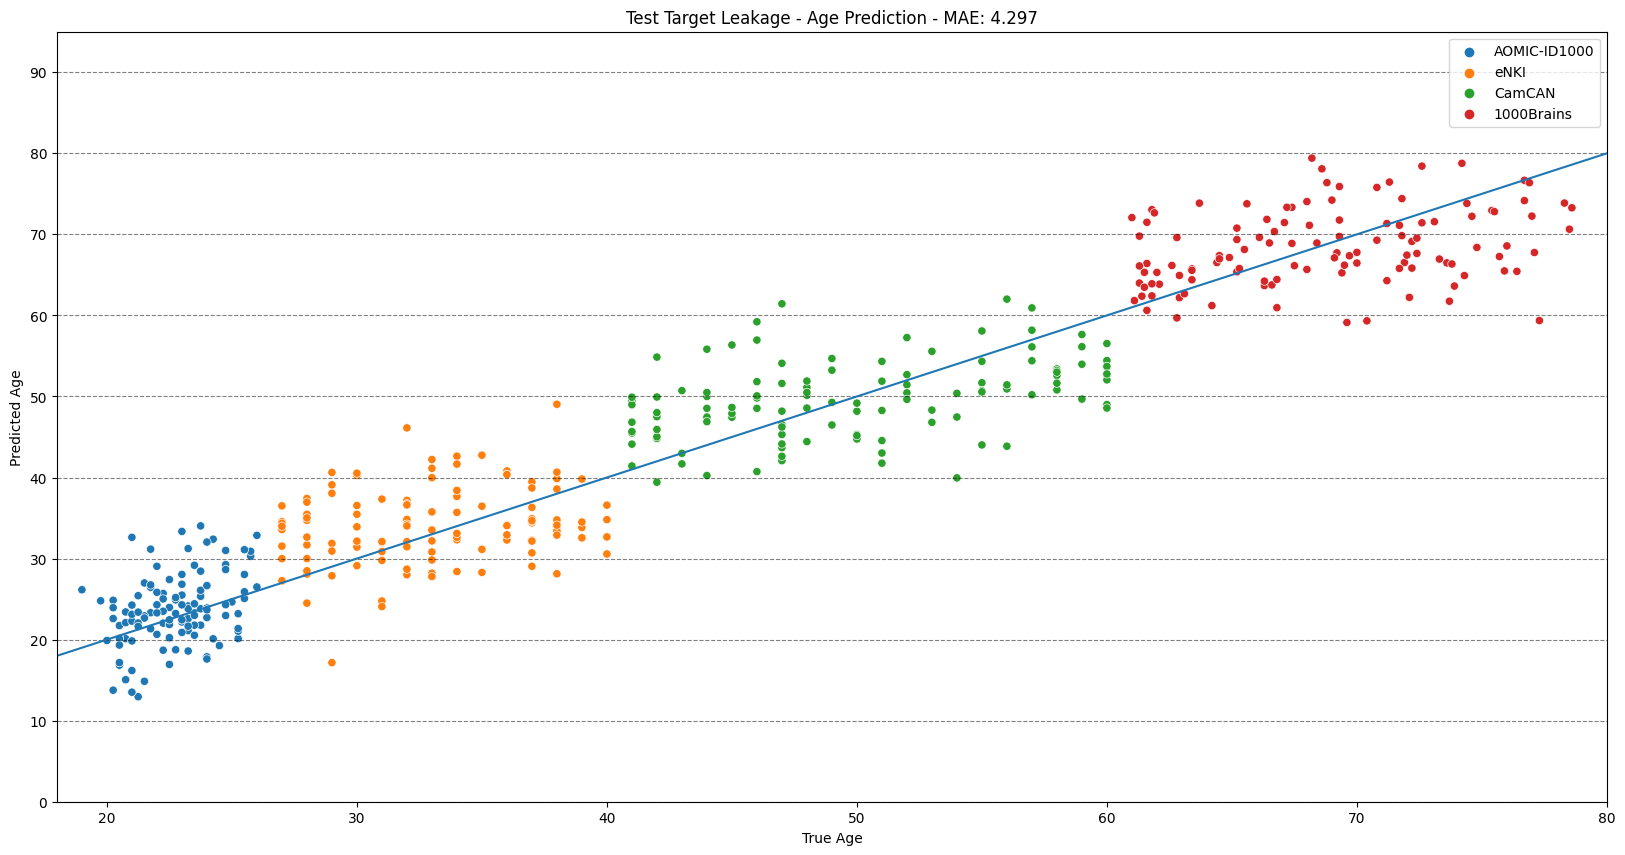

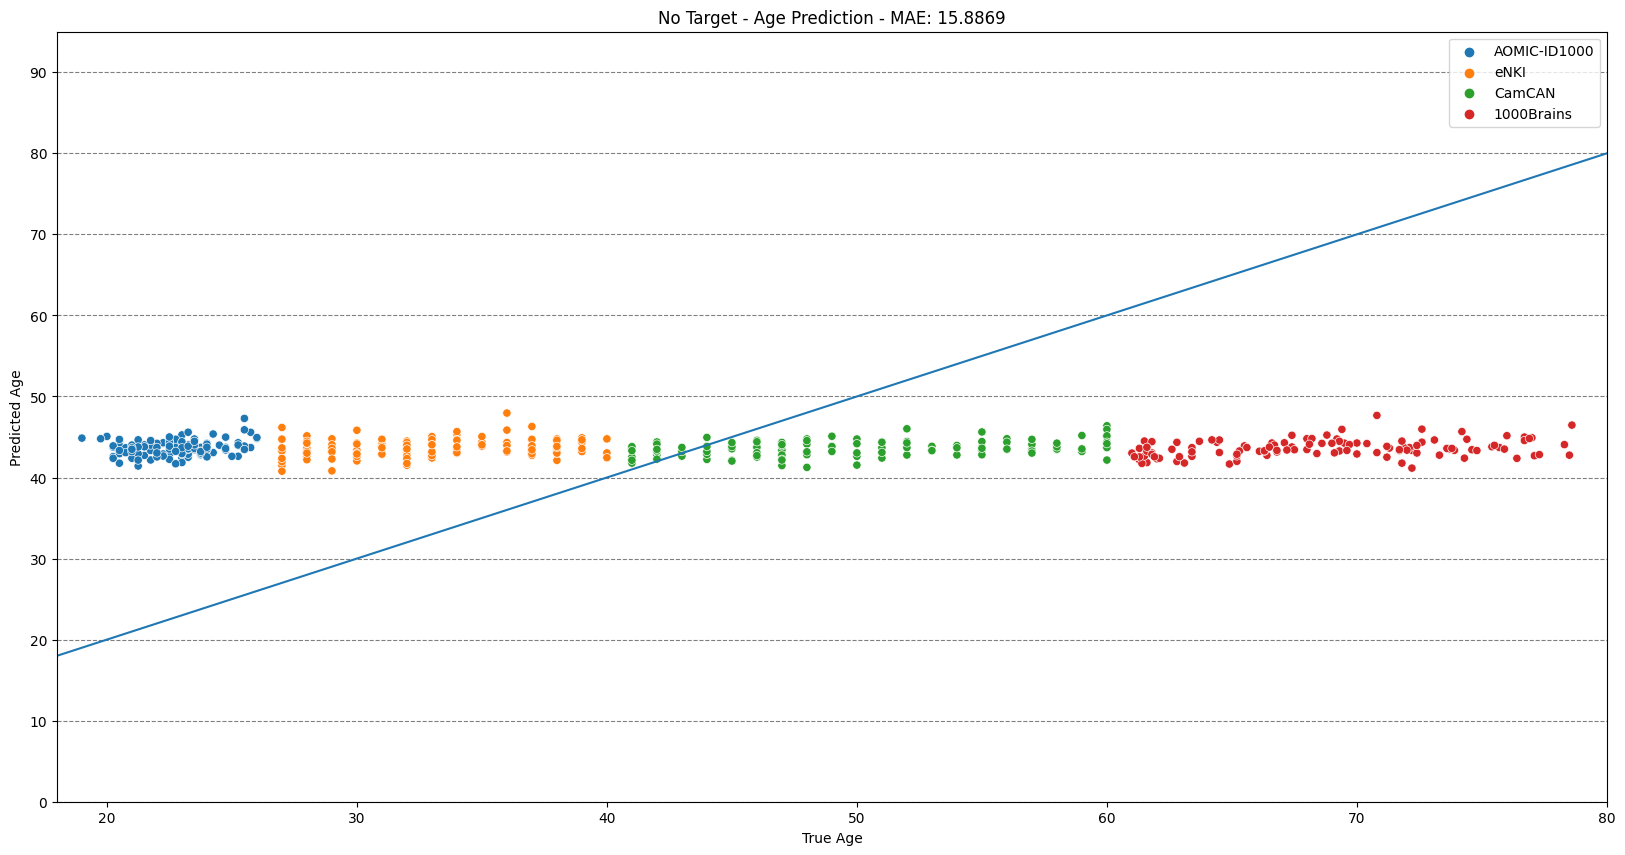

In [14]:
from sklearn.metrics import mean_absolute_error

harm_modes = ["Unharmonized", "PrettYharmonize", "Whole Data Harmonization", "Test Target Leakage",  "No Target"]

results["Harmonization Scheme"].replace({"juharmonize": "PrettYharmonize",
                                "leak": "Test Target Leakage",
                                "none": "Unharmonized",
                                "cheat": "Whole Data Harmonization",
                                "notarget": "No Target"}, inplace=True)

results["site"].replace({0: "AOMIC-ID1000",
                                1: "eNKI",
                                2: "CamCAN",
                                3: "1000Brains",}, inplace=True)
data = results



absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]


hue_order = ['AOMIC-ID1000', 'eNKI', 'CamCAN', '1000Brains',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Scheme"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    MAE = round(mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"]),4)
    plt.title(harm_to_plot + " - Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,80]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()





In [38]:
data["site"].unique()

array(['eNKI', 'CamCAN', '1000Brains', 'AOMIC-ID1000'], dtype=object)

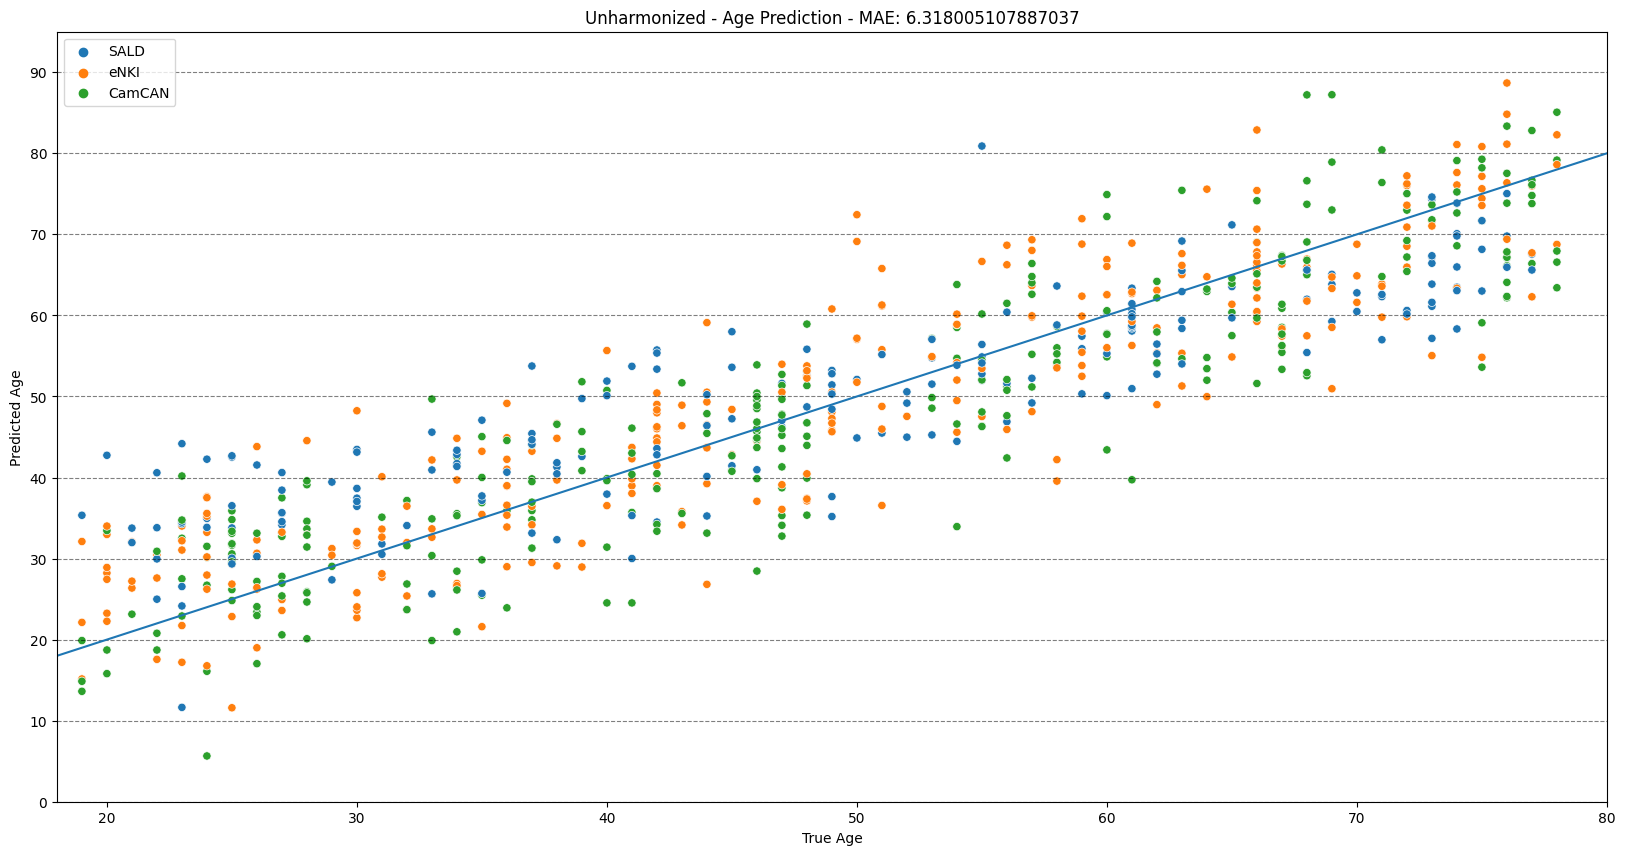

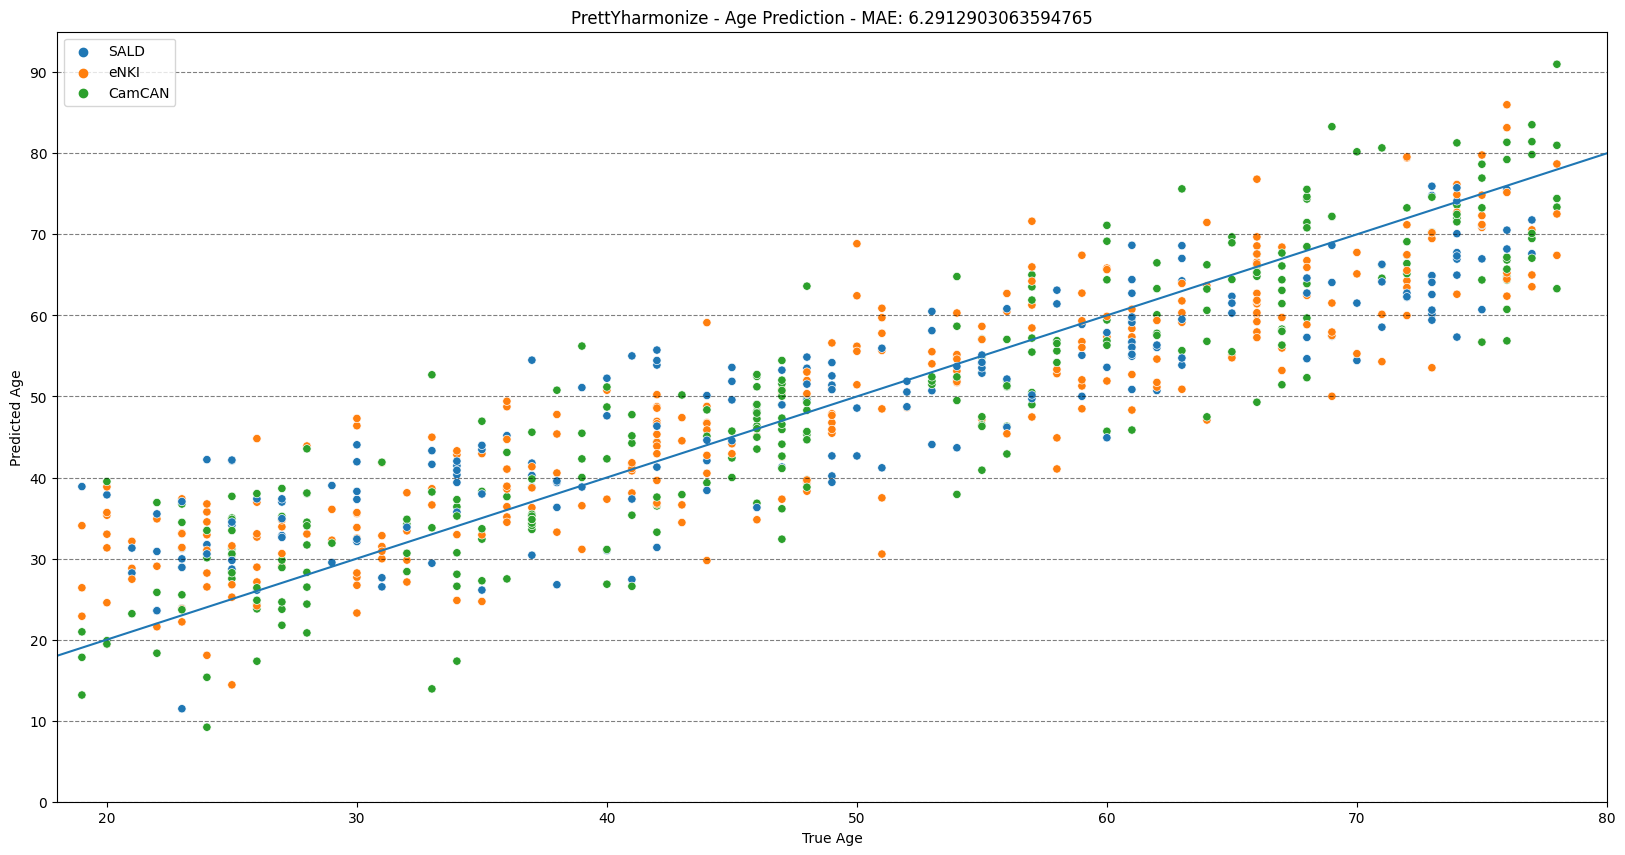

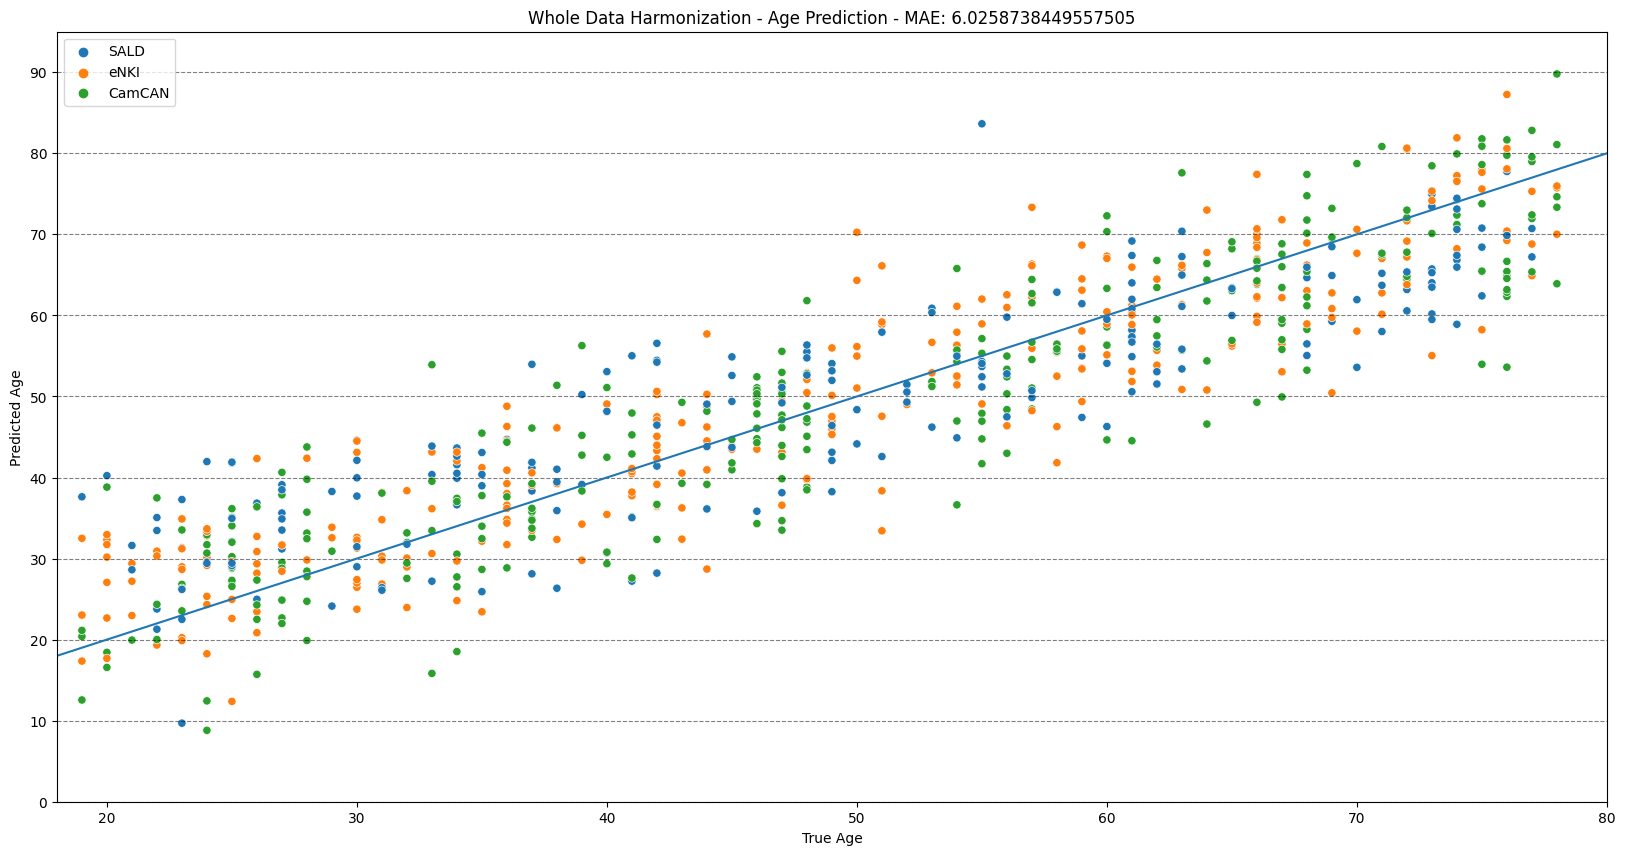

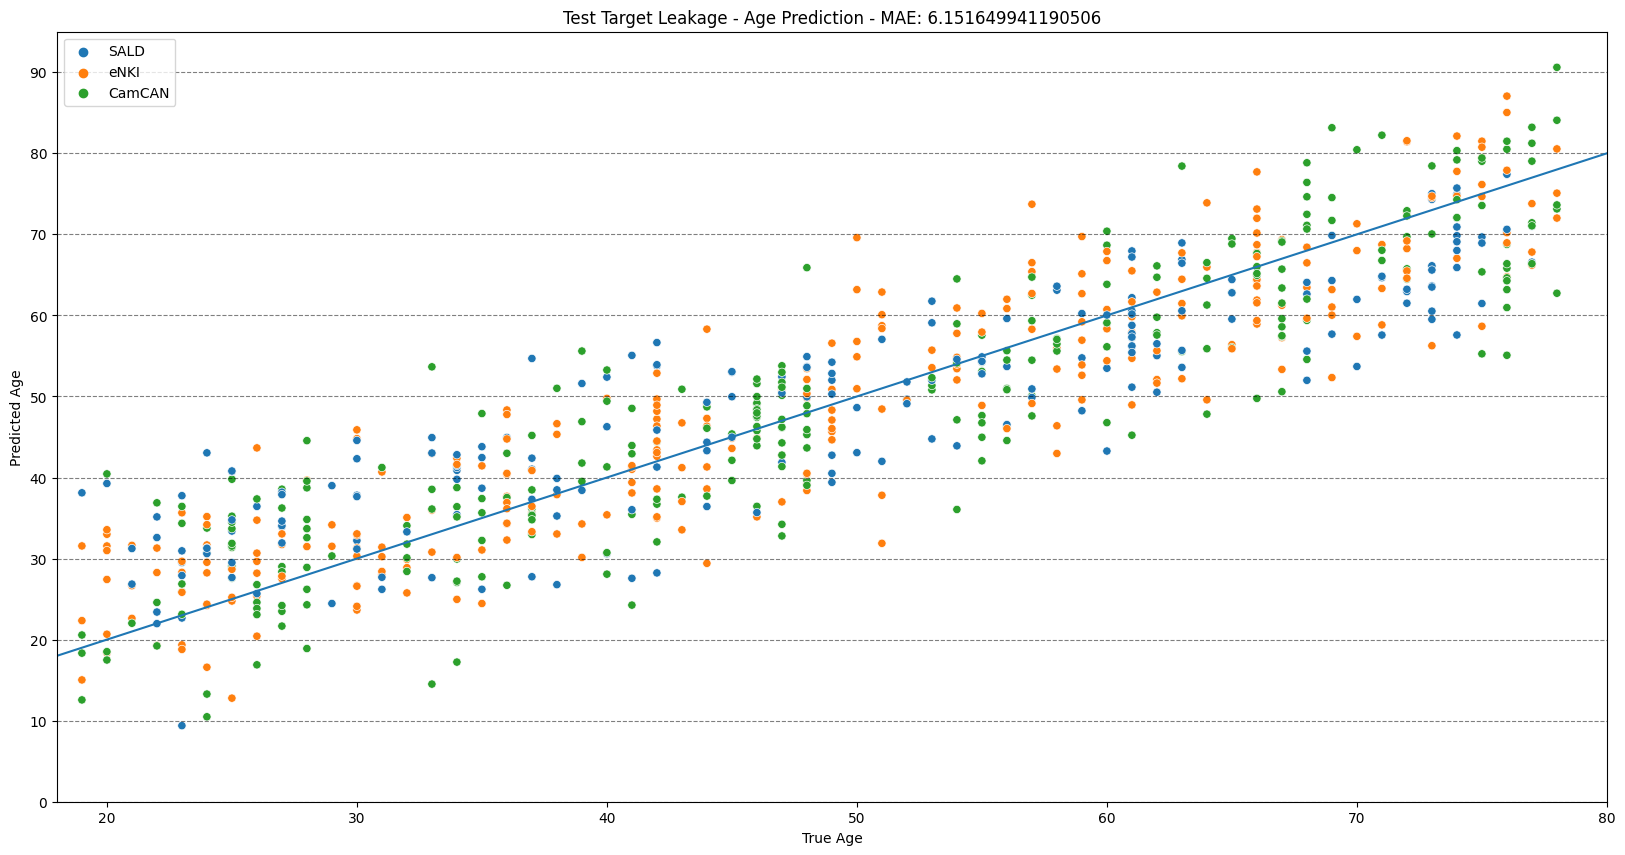

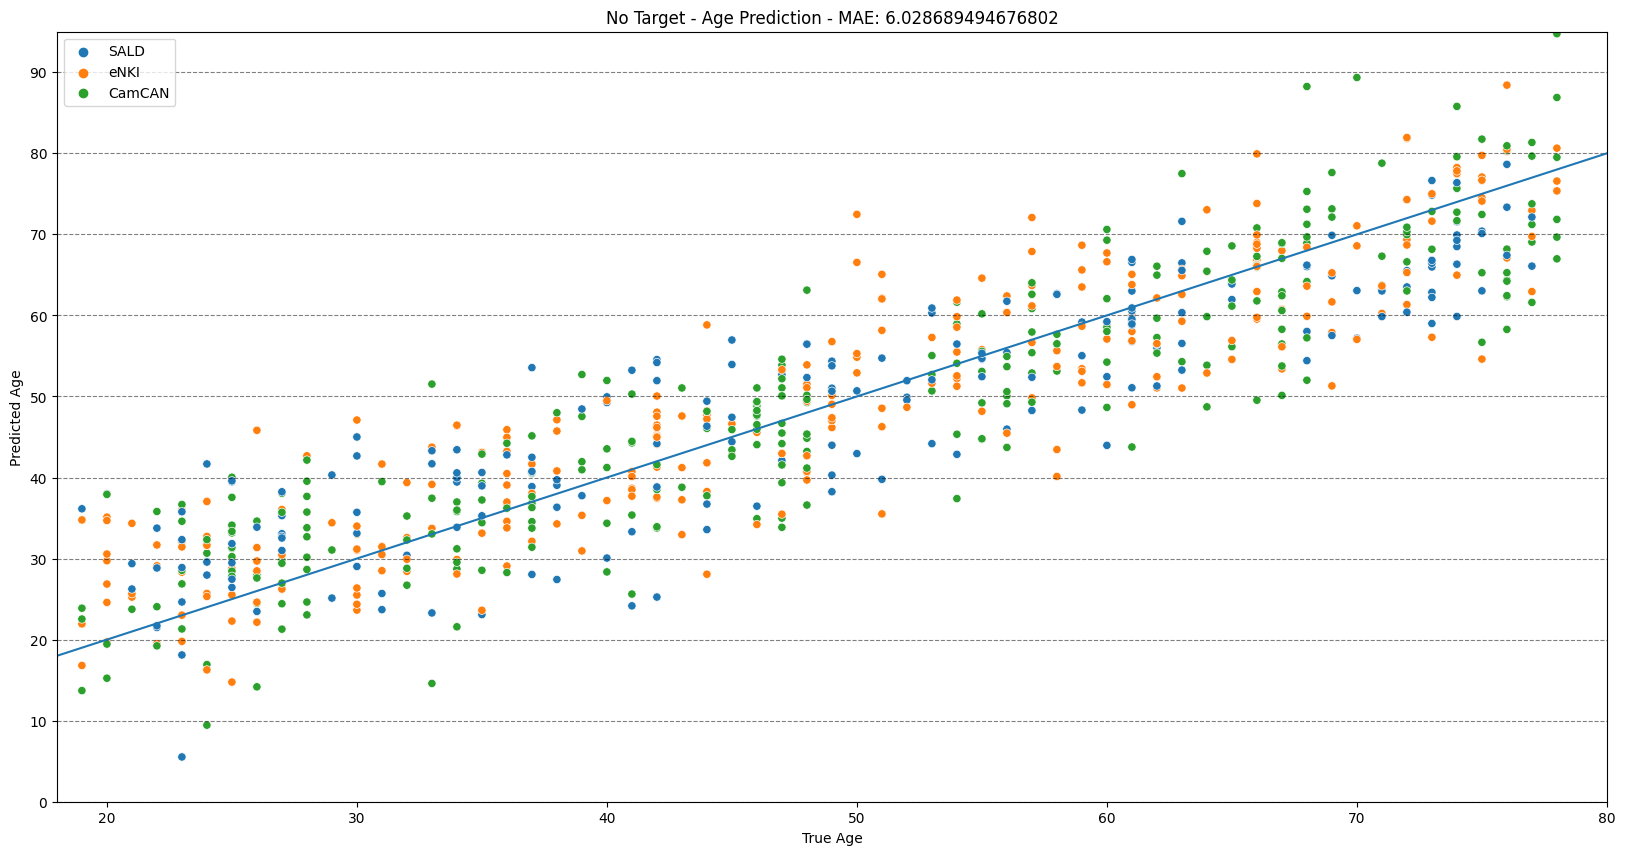

In [16]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_balanced_data_rvr_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "PrettYharmonize",
                                "target": "Test Target Leakage",
                                "none": "Unharmonized",
                                "cheat": "Whole Data Harmonization",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
harm_modes = ["Unharmonized", "PrettYharmonize", "Whole Data Harmonization", "Test Target Leakage",  "No Target"]


absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]
hue_order = ['SALD', 'eNKI', 'CamCAN',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"])
    plt.title(harm_to_plot + " - Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,80]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()



